# Iris Flower Classification
## Nearest Neighbor K Method (KNN)
>### Author: Lu (Christina) Jin

# Setup: Import all libraries

In [2]:
import os
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy as scipy

import statsmodels.api as sm
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from math import sqrt
from matplotlib.ticker import PercentFormatter
from scipy import stats
from pylab import rcParams
rcParams['figure.figsize'] = (20, 10)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

# Acquiring Dataset 

In [6]:
# Read data
iris = datasets.load_iris()
iris_df = iris.data
iris_label = iris.target
len(iris_df)
iris_df

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Setup Dataset 

In [42]:
# split data into train and test sets
np.random.seed(100)
indice = np.random.permutation(len(iris_df))
sample = 25
iris_train = iris_df[indice[:-sample]]
iris_test = iris_df[indice[-sample:]]
iris_train_label = iris_label[indice[:-sample]]
iris_test_label = iris_label[indice[-sample:]]

### NOTES:

**This step is to mannually split the iris data into train and test sets for both the flower entity and the flower catagory. Enable to do this, we first need to set a fixed number for random seed, this is to ensure the stationary of samplling no matter how many times we run the script, so we won't end up getting different results every single time.**

**Secondly, we need to randomly indice the iris dataset, and set the number we are willing to use as testing samples, in this case we are selecting 25 samples for testing. Then finally, we can split both the data set and the label set into training and testting sets by letting the training set be the entire dataset exclude the last 25 rows, and testing set be the last 25 rows.**

# Using Nearest Neighbor to Classify Iris Flowers

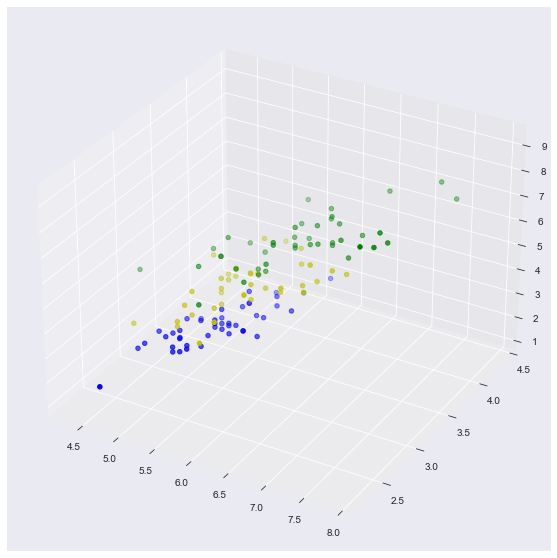

In [43]:
# Creating for loops for classification
X = []
for species in range(3):
    X.append([[], [], []])
    for i in range(len(iris_train)):
        if iris_train_label[i] == species:
            X[species][0].append(iris_train[i][0])
            X[species][1].append(iris_train[i][1])
            X[species][2].append(sum(iris_train[i][2:]))
            
color = ("b","y","g")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for species in range(3):
    ax.scatter(X[species][0], X[species][1], X[species][2], c=color[species])
    
plt.show()

### NOTES:

**In order to create a visual to identify each classfication of iris flower through nearest neighbor method, we are first building a for loop through each the data point from the training data set to classify the different flowers which are represented by 0, 1, and 2. Then by assigning colors and running the loop, we will be able to classifying them as different species with different color indications. Here in this case, we have blue representing species 0, yellow representing species 1, and green representing species 2.**

**Once we have all the data points plotted, all scatters will be shown in different colors in a multi-axis space. Although there are some points ran into each other, it is quite obvious that three klusters with blue, yellow and green dots are formed. Where many point of a color blends into another means that there are some similarities between the two species, for example species 1 and 2**

# Setup Nearest Neighbor Model

In [61]:
# define distance for nearness of nearest neighbor
def distance(d1, d2):
    d1 = np.array(d1)
    d2 = np.array(d2)
    return np.linalg.norm(d1 - d2)

# define and build nearest neighbor model to predict species' allocation for each point
def nearest_neighbor(train_set, labels, test_instance, k, distance = distance):
    distances = []
    for index in range(len(train_set)):
        dist = distance(test_instance, train_set[index])
        distances.append((train_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances [:k]
    return(neighbors)

# define prediction
def predict(neighbors):
    class_count = Counter()
    for neighbor in neighbors:
        class_count[neighbor[2]] += 1
    return class_count.most_common(1)[0][0]
    

# Run Model for Results

In [134]:
for i in range(sample):
    neighbors = nearest_neighbor(iris_train, iris_train_label, iris_test[i], 5, distance = distance)
    prediction = np.array([predict(neighbors)])
    label_pred = np.array(prediction)
        
    print("index:", i,
          ", model prediction:", predict(neighbors),
          ", label:", iris_test_label[i],
          ", data:", iris_test[i])

index: 0 , model prediction: 1 , label: 1 , data: [5.2 2.7 3.9 1.4]
index: 1 , model prediction: 1 , label: 1 , data: [6.1 3.  4.6 1.4]
index: 2 , model prediction: 0 , label: 0 , data: [5.  3.6 1.4 0.2]
index: 3 , model prediction: 2 , label: 2 , data: [6.3 3.3 6.  2.5]
index: 4 , model prediction: 2 , label: 2 , data: [6.7 2.5 5.8 1.8]
index: 5 , model prediction: 2 , label: 2 , data: [7.4 2.8 6.1 1.9]
index: 6 , model prediction: 1 , label: 1 , data: [6.7 3.1 4.7 1.5]
index: 7 , model prediction: 1 , label: 1 , data: [5.  2.3 3.3 1. ]
index: 8 , model prediction: 1 , label: 1 , data: [6.6 2.9 4.6 1.3]
index: 9 , model prediction: 1 , label: 1 , data: [5.  2.  3.5 1. ]
index: 10 , model prediction: 2 , label: 2 , data: [7.3 2.9 6.3 1.8]
index: 11 , model prediction: 2 , label: 2 , data: [6.2 3.4 5.4 2.3]
index: 12 , model prediction: 0 , label: 0 , data: [4.9 3.1 1.5 0.2]
index: 13 , model prediction: 0 , label: 0 , data: [5.8 4.  1.2 0.2]
index: 14 , model prediction: 1 , label: 1 ,

# Test Model Accuracy

In [162]:
# gather all the predicted label results
pred = []
for i in range(sample):
    neighbors = nearest_neighbor(iris_train, iris_train_label, iris_test[i], 5, distance = distance)
    #prediction = pd.DataFrame([predict(neighbors)])
    pred.append([predict(neighbors)])

In [160]:
# put all predicted results in a single 
def Extract(list):
    return [item[0] for item in list]

label_pred = Extract(pred)
label_pred

[1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0]

In [158]:
metrics.accuracy_score(iris_test_label, label_pred)

1.0

# Using SKLearn Neighbor Method Solving the Problem

In [163]:
# define model and algorithm
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(iris_train, iris_train_label)
knn_label_pred = knn.predict(iris_test)

# get accuracy for the new model
print(metrics.accuracy_score(iris_test_label, knn_label_pred))

1.0


# Analyze the Model

#### Q1: What was the overall accuracy of the model?

I've used two ways to define two different models for a nearest neighbor (KNN) aproach for classifying the iris flower dataset. After running both model and test for the accuracy, both models had a score of 1, or in another word 100% accuracy. Therefore, I'm getting 100% accuracy for both of my models.

#### Q2: What was the accuracy of each type of iris?

As I mentioned in the last question, since the accuracy is 100%, so the it remains a 100% accuracy for all types of iris flowers.

#### Q3: Would you classify the model as a good model or not?

If by just looking at the accuracy score of the model, I would confidently say that my models are perfect. But in fact, given it a second thought I can only say that I do have pretty good (decent) model instead 

Even though the models are shown with perfect accuracy scores, instead of perfect, I would rather classify these models as pretty good (decent) models. Since Regularly, in real life cases or examples with more data input or more complicated classifications, it is very unlikely we will be getting a 100% accuracy model. And even we do, higher chances are we are over fitting our model. Thus, in this case I would assume that some of the reasons that I'm getting a perfectly fitted model could be as follows:
> 1) There aren't too many data inputs in the original iris flower dataset
>
> 2) The number of samples in the test set is too small
>
> 3) It was just lucky that I've got a perfect random training set to train my model
>
> 4) The number of neighbors (or the so called k) has been set to a number that's too small

Therefore, I would say that it's quite odd (and lucky) that I happened to recieve a perfect accurate model, but it doesn't necessarily mean that my models are perfect.In future analysis of this dataset, I would adjust and fix the factors that I listed above, and re-run the model to test the accuracy again, or maybe make predictions on more iris flower and compare to the actual classification to see the results.